# Applied Statistics Tasks Notebook

Author: Sean Humphreys

Contact: sean@cruaghgreen.com

This Jupyter Notebook contains the solutions to the tasks for the 2024 Applied Statistics module on the ATU Mayo/Galway Higher Diploma in Science in Computing in Data Analytics.

## Contents

1. [Software Libraries](#software-libraries)

2. [Data Visualisation](#data-visualisation)

3. [Task 1 - Permutations and Combinations](#task-1---permutations-and-combinations)

4. [Task 2 - Numpy's Normal Distribution](#task-2---numpys-normal-distribution)

5. [Task 3 - t-Test Calculation](#task-3---t-test-calculation)

6. [Task 4 - ANOVA](#task-4---anova)

## Software Libraries <a id="software-libraries"></a>

The following software libraries are used in this notebook:

+ [Math](https://docs.python.org/3/library/math.html) (https://docs.python.org/3/library/math.html - last accessed 16. Oct 2024) The math library provides access to the mathematical functions defined by the C standard.

+ [Itertools](https://docs.python.org/3/library/itertools.html#module-itertools) (https://docs.python.org/3/library/itertools.html#module-itertools - last accessed 16. Oct 2024). The itertools library is native within python. It provides functions creating iterators for efficient looping.

+ [Random](https://docs.python.org/3/library/random.html) (https://docs.python.org/3/library/random.html - last accessed 16. Oct 2024) The random library implements pseudo-random number generators for various distributions.

+ [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 16. Oct 2024)  - is an open-source software library for creating static, animated, and interactive visualisations in Python.

+ [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 16. Oct 2024) - is an open-source software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

+ [SciPy](https://scipy.org/) (https://scipy.org/ - last accessed 29 Oct. 2024) provides algorithms for scientific computing in Python. SciPy is a portmanteau of Scientific Python. It is a scientific computation library that uses Numpy underneath.

+ [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 14 Nov. 2024) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the Python programming language. A Pandas DataFrame is a dictionary like container for series objects. A DataFrame is the primary Pandas data structure.

+ [Seaborn](https://seaborn.pydata.org/) (https://seaborn.pydata.org/ - last accessed 14 Nov. 2024) - is visualisation software that is built on matplotlib. It offers a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import the required software libraries in the order they are used in the notebook
import math
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import t
import pandas as pd
import seaborn as sns

## Data Visualisation <a id="data-visualisation"></a>

The "fivethirtyeight" plot stye sheet is applied which tries to replicate the styles from [https://abcnews.go.com/538](https://abcnews.go.com/538) (last accessed 16. Oct 2024).

In [2]:
# plot styling 
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html [Accessed 16 Oct. 2023]
plt.style.use('fivethirtyeight')

# set the default size of plots
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib [Accessed 21 Oct. 2024]
plt.rcParams["figure.figsize"] = (10,5)

---

## Task 1 - Permutations and Combinations <a id="task-1---permutations-and-combinations"></a>

### Problem Statement

Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk poured in first and the other six have the tea poured in first. Upon tasting it, a person claims that they have the special power of being able to tell if the tea or the milk was poured into the cup first. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups. 

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. 

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

### Introduction

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">

The [*Lady Tasting Tea Experiment*](https://en.wikipedia.org/wiki/Lady_tasting_tea) (https://en.wikipedia.org/wiki/Lady_tasting_tea)  is an experiment devised by [Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) (https://en.wikipedia.org/wiki/Ronald_Fisher) to test the null hypothesis.


Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether the milk or the tea was poured into her cup first. In the experiment the lady is presented with eight cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely.

![tea cups](images/task_1/tea_cups.png "tea cups")

<i>Imaged sourced https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/</i>


### Null Hypothesis
*"A null hypothesis is a type of statistical hypothesis that proposes that no statistical significance exists in a set of given observations"* (Investopedia, n.d.). The null hypothesis is denoted by H<sub>0</sub>. In the *Lady Tasting Tea Experiment* the Null Hypothesis is that the lady has no special ability to tell is the milk was poured into the cup of tea before the tea.

The statement that is being tested against the null hypothesis is the alternative hypothesis. The alternative hypothesis is denoted by H<sub>a</sub>. 

H<sub>0</sub> and H<sub>a</sub> are mutually exclusive (Majaski, 2024). Only one can be true. However, one of the two hypotheses will always be true. 

The statistical likelihood of the lady correctly selecting the four cups of tea with milk poured first was so low that it would be surprising for this to happen. In this case Fisher was willing to reject null hypothesis.

### Assumptions

1. H<sub>0</sub> is that the lady has no special powers in figuring it out, she is randomly guessing which cups had the milk poured in first.

2. H<sub>a</sub> is that the lady can tell the difference between cups of tea that have the milk poured in first and cups of tea that had the tea poured in first.

3. There is no replacement once a cup has been selected. That is to say that the first cup is selected from a total of twelve cups, the second from a pool of eleven cups, the third from a pool of ten cups, etc.

4. The order in which the cups of tea with milk poured are selected first doesn't matter, the lady just has to correctly identify the six cups.

#### Calculate, using Python, the probability that they select the correct six cups.

Firstly, using Python calculate the number of permutations for twelve cups.

In [3]:
# assign the total number of cups to a variable
total_no_cups = 12

In [4]:
# define a function to return the factorial of an int
# based on code found here: https://www.programiz.com/python-programming/examples/factorial

def fact(num):
    factorial=1
    for i in range(1,num + 1):
        factorial = factorial*i
    return factorial

In [5]:
perms_total = fact(total_no_cups)
print(f'The total number of permutations for {total_no_cups} cups is {perms_total}.')

The total number of permutations for 12 cups is 479001600.


The order in which the cups with milk in first are selected doesn't matter, the lady has to select the six cups with milk in first. To calculate the number of possible combinations that the six cups with milk in first can be selected can be expressed as:

$6 \times 5 \times 4 \times 3 \times 2 \times 1 = 6! = 720$

The total number of cups selected = $r$

The total number of combinations possible is $r!$

Calculating $r!$ with Python:

In [6]:
# assign the number of cups selected to a variable
no_of_cups_selected = 6

combs_total = fact(no_of_cups_selected)
print(f'The total number of combination for {no_of_cups_selected} cups is {combs_total}.')

The total number of combination for 6 cups is 720.


Dividing the total number permutations by the total number of combinations would be incorrect as it does not reduce it by how many ways the six cups could be in order. Adjusting this caclulation to take this into account is expressed as

$\binom {n}{r} = {\frac {n!}{r!(n-r)!}}$

This is also known as n choose r (Mathsisfun.com, 2017). In this specific example it is 12 choose 6.

Using Python to calculate the chance of selecting the six cups with milk in first:

In [7]:
# n!/r!(n-r)!
ans = perms_total//(combs_total*(fact(total_no_cups-no_of_cups_selected)))
print(f'The chance of selecting the six milk in first cups out of the' 
      f' twelve cups is a 1 in {ans} chance.\nThe probability is {1/ans}')

The chance of selecting the six milk in first cups out of the twelve cups is a 1 in 924 chance.
The probability is 0.0010822510822510823


This can be validated using the in built ```math comb()``` method in Python.

This function "*returns the number of ways picking k unordered outcomes from n possibilities, without repetition, also known as combinations*" (www.w3schools.com, n.d.).

[math.comb()](https://docs.python.org/3/library/math.html#math.comb) - accessed 23rd. Nov 2024.

In [8]:
ans_2 = math.comb(12,6)

if ans == ans_2:
    print(f'Your manually calculated solution of {ans} is correct')
else:
    print('Your manually calculated solution is incorrect.')

Your manually calculated solution of 924 is correct


**Answer** - the probability that they select the correct six cups is 0.001 (rounded).

#### Calculate the probability, assuming they have no special powers, that the person makes at most one error.

To *make at most one error* the lady can either:

1. choose six cups correctly from twelve 

or

2. five cups correctly from the six cups that were chosen.

In scenario 1, as previously demonstrated by using the ``math.comb(12,6)`` function, there is a 1 in 924 chance of selecting the six cups with milk in first correctly. There is only one way to correctly select six cups.

In scenario 2 the lady still chooses six cups. Of those six cups five are correct. Mathematically the number of ways to do this is expressed as $\binom {6}{5}$ (6 choose 5).

Calculating $\binom {6}{5}$ with python:

In [9]:
math.comb(6,5)

6

Independently of choosing five correct cups from six the lady must choose one incorrect cup from 6: 

In [10]:
math.comb(6,1)

6

$\therefore$ the number of combinations to select five correct cups $= 6 \times 6 = 36$

Adding the outcome of scenario 1 and 2:

$\frac {1}{924} + \frac {36}{924} = \frac {37}{924}$

In [11]:
ans_3 = 37/924

print(f'The probability that the person makes at most one error is {ans_3}.')

The probability that the person makes at most one error is 0.04004329004329004.


An alternative demonstration of this is presented below and is based on lecture material (Mc Donald, 2024).

Each of the cups is assigned a label, in this instance a number.

In [12]:
# cup labels.
labels = list(range(total_no_cups))

# display labels list
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Out of the 12 labelled cups 6 are chosen.

In [13]:
# Show the different ways of selecting 6 cups with milk_first out of 12 cups of tea.
# https://docs.python.org/3/library/itertools.html#module-itertools
combinations_of_milk_first = list(itertools.combinations(labels, no_of_cups_selected))

print(f'There are {len(combinations_of_milk_first)} possible combinations of 6 labels'
      ' with no repetition.')

# The set of all possible combinations of 6 labels
combinations_of_milk_first;

There are 924 possible combinations of 6 labels with no repetition.


Randomly selecting one of these combinations

In [14]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
ladies_choice = random.sample(labels, 6)

# Assume these are the six cups randomly selected by the lady
ladies_choice

[3, 5, 2, 10, 9, 7]

Calculate the overlap between each element of combs and ladies_choice.

In [15]:
no_overlaps = []

for combination in combinations_of_milk_first:
  # Turn comb into a set.
  s1 = set(combination)
  # Turn ladies_choice into a set.
  s2 = set(ladies_choice)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

In [16]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

In [17]:
x_counts = counts[1]

Displaying the number of combinations of correct cups guessed on a bar chart shows a symmetry that resembles a standard distribution.

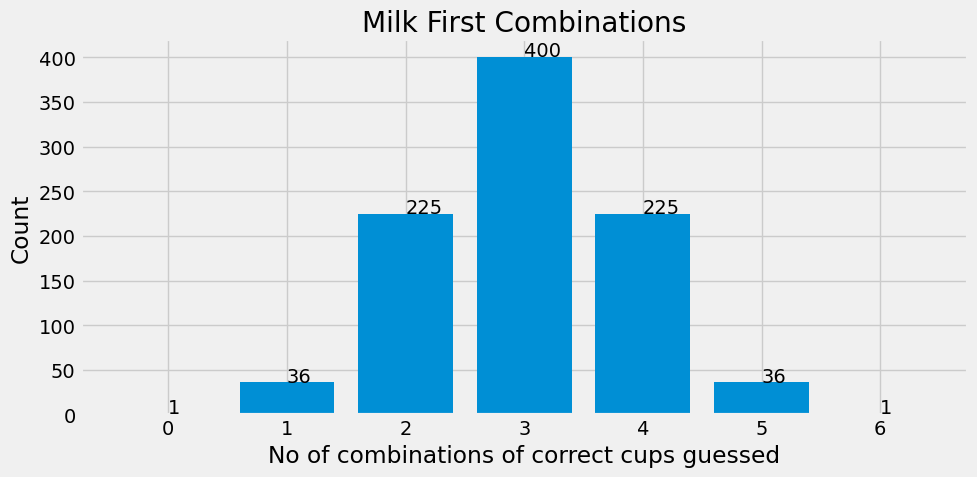

In [18]:
plt.bar(counts[0], counts[1])
plt.title('Milk First Combinations')
plt.ylabel('Count')
plt.xlabel('No of combinations of correct cups guessed')
for index, da in enumerate(x_counts):
    plt.text(x=index, y=da+1, s=f'{da}')
plt.tight_layout()
plt.show()

**Answer** - the probability, assuming they have no special powers, that the person makes at most one error is 0.04 (rounded).

#### Would you accept two errors? Explain.

Calculating the probability of two errors:

$\frac {225}{924} + \frac {36}{924} + \frac {1}{924} = 0.28$ (rounded)

In [19]:
# using python to calculate the probability of at most two errors

((math.comb(12,6)/924) + (math.comb(6,5) * math.comb(6,1)) 
 + (math.comb(6,4) * math.comb(6,2)))/924

0.28354978354978355

In most cases, the predetermined level of significance for rejecting the null hypothesis will be 0.05 (Bevans, 2019). That is, when there is a less than 5% chance that one would see these results if the null hypothesis were true.

The probability of the lady selecting the six correct cups is 1 in 924 (p=0.1%). This is extremely rare. The chance of it happening at random is low thus H<sub>0</sub> can be accepted. In theory the lady could select the six cups by random chance on her first attempt. This could be mitigated against by running the experiment multiple times.

The probability of the lady selecting the six cups but allowing for two errors is slightly higher 1 in 4 (p = 28%). This is greater than the 5% threshold for accepting H<sub>0</sub>. The chance of it occurring at random is high.

In this case, if one was to reject the H<sub>0</sub> and accept H<sub>a</sub> there is a risk of a false positive. One accepts that the lady has the ability to discern when milk was poured first into the cup when in reality she has no special ability.

**Answer** - I would not reject the null hypothesis, or accept two errors, as the the risk of as false positive is too great.

### References

Bevans, R. (2019). Hypothesis Testing | A Step-by-Step Guide with Easy Examples. [online] Scribbr. Available at: https://www.scribbr.com/statistics/hypothesis-testing/. [Accessed 20th Oct. 2024].

Investopedia. (n.d.). Null Hypothesis: What Is It and How Is It Used in Investing? [online] Available at: https://www.investopedia.com/terms/n/null_hypothesis.asp#toc-what-is-a-null-hypothesis. [Accessed 18th Oct. 2024].

Majaski, C. (2024). Hypothesis Testing: 4 Steps and Example. [online] Investopedia. Available at: https://www.investopedia.com/terms/h/hypothesistesting.asp#toc-how-hypothesis-testing-works [Accessed 20 Oct. 2024].

Mathsisfun.com. (2017). Combinations and Permutations. [online] Available at: https://www.mathsisfun.com/combinatorics/combinations-permutations.html. [Accessed 10th Oct. 2024].

Mc Donald, I. (2024) '02_lady_tasting_tea.ipynb', *8651 Applied Statistics*, Atlantic Technical University. October 2024.

Wikipedia Contributors (2019). Lady tasting tea. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Lady_tasting_tea. [Accessed 10th Oct. 2024].

Wikipedia Contributors (2019). Ronald Fisher. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Ronald_Fisher. [Accessed 10th Oct. 2024].

Winkler, A.M. (2015). The lady tasting tea experiment. [online] Brainder. Available at: https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/. [Accessed 10th Oct. 2024].

www.programiz.com. (n.d.). Python Program to Find the Factorial of a Number. [online] Available at: https://www.programiz.com/python-programming/examples/factorial. [Accessed 10th Oct. 2024].

www.w3schools.com. (n.d.). Python math.comb() Method. [online] Available at: https://www.w3schools.com/python/ref_math_comb.asp.  [Accessed 16th Oct. 2024].

---

## Task 2 - Numpy's Normal Distribution <a id="task-2---numpys-normal-distribution"></a>

### Problem Statement Part One

1. Generate, `numpy.random.normal()` , a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

#### Solution

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The characteristic standard distribution bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within 2 standard deviations of the mean. 

![Normal Distribution Curve](images/task_2/standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

<sub>By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713</sub>

The code in the solution below is based on code from
1. [https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal), accessed 21 Oct. 2024.

2. [https://realpython.com/numpy-random-normal/](https://realpython.com/numpy-random-normal/), accessed 21 Oct. 2024.


In [20]:
# define variables - no of values to be generated, mean, standard deviation
# and no of bins for histograms
n, mu, sigma, n_bins = 100000, 10.0, 3.0, 30

In [21]:
# define random generator 
# https://numpy.org/doc/stable/reference/random/index.html#quick-start
rng = np.random.default_rng(seed=49)

# randomly generate the requested values
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
values = rng.normal(mu, sigma, n)

The values generated by *Numpy* can be visualised using a histogram. This demonstrates the *bell curve* plot typical of a Gaussian distribution.

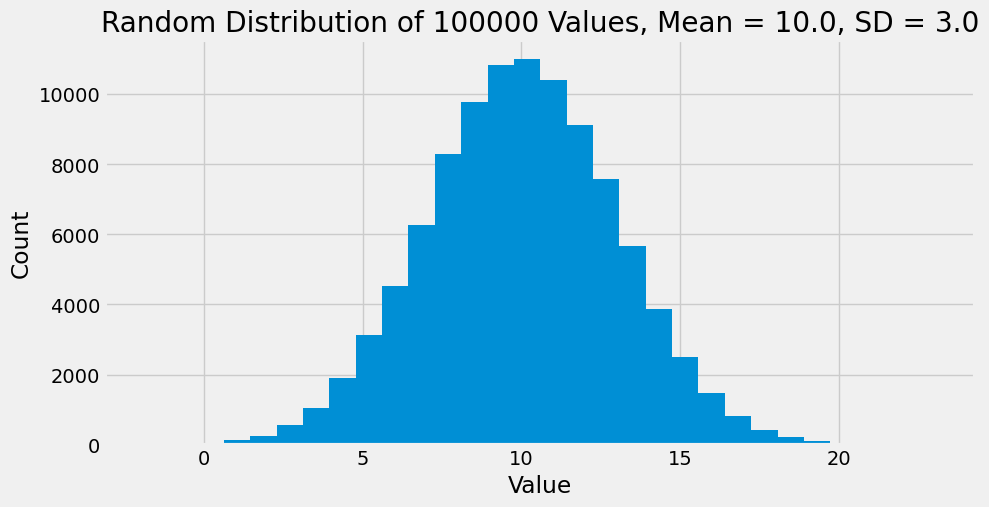

In [22]:
# create axes
fig, ax = plt.subplots()

# plot histogram of the data
ax.hist(values, bins=n_bins)
ax.set_title(f'Random Distribution of {n} Values, Mean = {mu}, SD = {sigma}')
ax.set_xlabel('Value')
ax.set_ylabel('Count');

Visualising the first five elements in the array demonstrates that the values generated are continuous values as opposed to discrete values.

In [23]:
# show the first five values generated
values[0:5]

array([11.71196804, 14.14782443, 10.71656127,  5.4419013 , 10.36049027])

### Problem Statement Part Two

2. Use the `scipy.stats.shapiro()` function to test whether the sample generated comes from a normal distribution. Explain the results and output.

#### Solution

The Shapiro-Wilk test is a statistical test where the null hypothesis is that the data is normally distributed (Malato, 2023). This test has a flaw in so far as it doesn't work well with large datasets (ibid.).

This test outputs a test statistic and a p-value (probability). A W value close to one indicates that the data is likely to be normally distributed and a helps determine to reject or accept the null hypothesis (Humaizi, 2024). A common P-Value threshold is 0.05%. If the P-Value is great than this threshold the null hypothesis is accepted.

In Python Shapiro-Wilk test is implemented with ```scipy.stats.shapiro()``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro). This function takes an array as an input and returns the test statistic (W) and p-value.

The threshold for values is a choice that should be made before the data is analyzed with consideration of the risks of both false positives (incorrectly rejecting the null hypothesis) and false negatives (failure to reject a false null hypothesis), (ibid.).

In [24]:
# Run the Shapiro-Wilk test on the values
shapiro_results = stats.shapiro(values)

print(f"The test statistic (W) is {shapiro_results.statistic}.\n"
      f"The p-value is {shapiro_results.pvalue}.")

The test statistic (W) is 0.9999835223732305.
The p-value is 0.9728054525791827.


/home/sean/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In this instance a W value of 0.999 (rounded) indicates that the values in the generated array are likely to be normally distributed as the test statistic is close to one.

A p-value of 0.973 (rounded) is greater than 0.05 and the null hypothesis can be accepted. The high p-value could be inaccurate as per Malato (2023). In this instance it is known that the data is normally distributed as it has been drawn from a random normal distribution and visualisation of the data in a histogram plot confirms this.

### Problem Statement Part Three

3. Plot a histogram of the values and plot the corresponding normal distribution probability density function on top of it.

#### Solution

In mathematical terms the normal distribution probability density function is expressed as:

$f(x)={\frac {1}{\sigma\sqrt {2\pi ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$

<sub>(Martins, 2023)</sub>

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

In this instance $\mu = 10$ and $\sigma = 3$

A Python function is defined to return the probability density function based on the above mathematical function.

In [25]:
# based on code found at:
# https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html
def normal_dist(x , mean , sd):
    prob_density = 1/(sd*np.sqrt(2 * np.pi))*np.exp(-(x-mean)**2 /(2 * sd**2))
    return prob_density

In [26]:
# Assign the max & min values to a variable
max = values.max()
min = values.min()

The ```np.linspace()``` method is used to return evenly spaced numbers over a specified interval.

[np.linspace()](https://numpy.org/devdocs/reference/generated/numpy.linspace.html#numpy-linspace) - accessed 23rd. Nov 2024.

In [27]:
x_axis = np.linspace(min, max, n)

The probability density function for the x_axis variable is returned.

In [28]:
pdf = normal_dist(x_axis, mu, sigma)

The probability density function is plotted over a histogram of the the randomly normally distributed values.

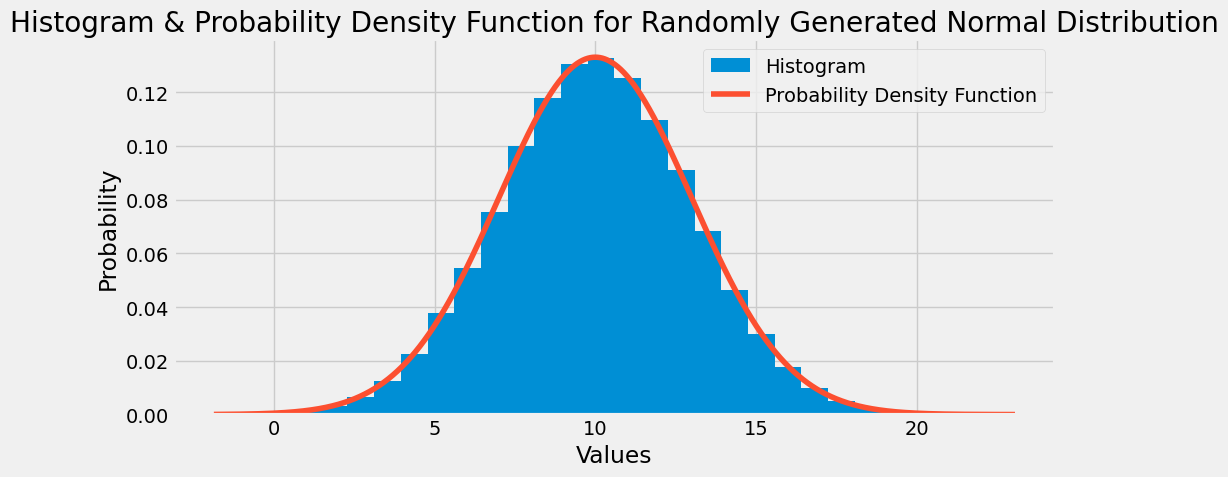

In [29]:
# create an empty plot
fig, ax = plt.subplots()

# plot the histogram and PDF
ax.hist(values, bins=n_bins, density=True, label='Histogram')
ax.plot(x_axis, pdf, label='Probability Density Function')
ax.legend()
ax.set_title('Histogram & Probability Density Function for Randomly Generated Normal Distribution')

# show the plots
plt.xlabel('Values')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

An alternative method to plot the PDF over the distribution is to use the ```stat.norm.pdf()```.

[stats.norm()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy-stats-norm) - accessed 23rd Nov. 2024

This method takes the set of values, the mean and the standard deviation as inputs. It returns the probility density function. This is then plotted over the histogram of the randomly generated values.

**Answer:**

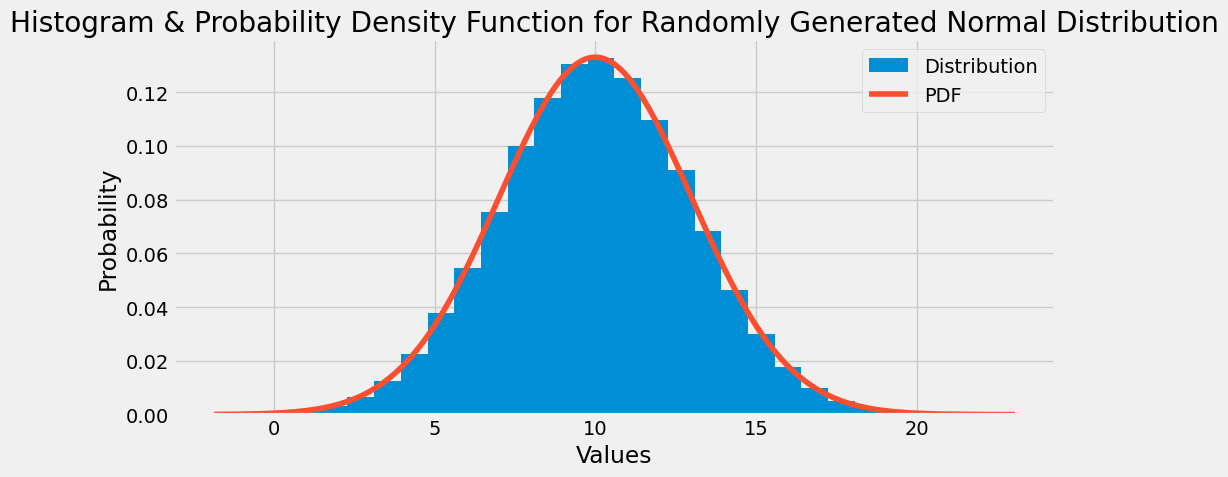

In [30]:
# create an empty plot
fig, ax = plt.subplots()

# Plot the pdf and historgram
ax.hist(values, density=True, bins=n_bins, label='Distribution')
ax.plot(x_axis, stats.norm.pdf(x_axis, mu, sigma), label='PDF')
ax.set_title('Histogram & Probability Density Function for Randomly Generated Normal Distribution')

# show the plots
plt.legend()
plt.xlabel('Values')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

### References

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 21 Oct. 2024].

Humaizi, A. (2024). 10.0 Shapiro-Wilk test - Ahmad Humaizi - Medium. [online] Medium. Available at: https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6. [Accessed 29 Oct. 2024].

Malato, G. (2023). An Introduction to the Shapiro-Wilk Test for Normality | Built In. [online] builtin.com. Available at: https://builtin.com/data-science/shapiro-wilk-test. [Accessed 29 Oct. 2024].

Martins, C. (2023). Gaussian Naive Bayes Explained With Scikit-Learn | Built In. [online] builtin.com. Available at: https://builtin.com/artificial-intelligence/gaussian-naive-bayes. [Accessed 27 Oct. 2024].

matplotlib.org. (n.d.). Matplotlib documentation — Matplotlib 3.5.0 documentation. [online] Available at: https://matplotlib.org/stable/. [Accessed 27 Oct. 2024].

Numpy (2009). NumPy. [online] Numpy.org. Available at: https://numpy.org/. [Accessed 21 Oct. 2024].

Python, R. (n.d.). How to Get Normally Distributed Random Numbers With NumPy – Real Python. [online] realpython.com. Available at: https://realpython.com/numpy-random-normal/. [Accessed 21 Oct. 2024]

SciPy (2020). SciPy.org — SciPy.org. [online] Scipy.org. Available at: https://scipy.org/. [Accessed 29 Oct. 2024].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 21 Oct. 2024].

---

## Task 3 - t Test Calculation <a id="task-3---t-test-calculation"></a>

### Problem Statement

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

1. Calculate the t-statistic based on this data set, using Python.

2. Compare it to the value given by `scipy.stats`.

3. Explain your work and list any sources used.

### t-Test

<img src="images/task_3/william_sealy_gosset.jpg" alt="William Sealy Gosset" style="height:300px;float:right;">

An employee in the Guinness brewery (St. Jame's Gate Dublin), William Sealy Gosset (pictured), first published t-Tests in 1908 in the scientific journal Biometrika using the pseudonym "Student" (Wikipedia Contributors, 2019). Gosset found that existing statistical techniques using large samples were not useful for the small sample sizes that he encountered in his work (Britannica, 2019).

<i>Imaged sourced https://en.wikipedia.org/wiki/Student%27s_t-test</i>

t-Test, also known as the *Student’s t-test*, is a method of testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown (Britannica, 2019). t-tests are used to compare sample populations and infer conclusions about the larger population (builtin.com, n.d.). For tests involving the mean of a sample of size greater than 30 the normal distribution is usually applied (Britannica, 2019).

There are two types of t-Tests:

+ Independent t-Tests - compares the means between two unrelated groups on the same continuous, dependent variable (Laerd Statistics, 2018)

+ The dependant t-test also called a paired t-Test - case where the samples are related, such as repeated measures on the same population (Brownlee, 2018)

From the given dataset it is clear that repeated measures have been carried out on the same population. That is to say that two separate measures of resting heart rate have been carried out on the same population before and after completing an exercise regime. Therefore, the appropriate t-Test to carry out in this situation is the *paired t-Test*.

### Hypotheses

The null hypothesis (H<sub>0</sub>) is that the mean resting heart rate of patients does not change after undertaking a two-week exercise regime.

The alternative hypothesis (H<sub>a</sub>) is that there is a change in the mean resting heart rate of patients after undertaking a two-week exercise regime.

### Exploratory Data Analysis

The dataset is stored in a pandas dataframe. A [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas-dataframe) (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas-dataframe accessed 14th Nov. 2024) is defined as *"Two-dimensional, size-mutable, potentially heterogeneous tabular data."* A pandas dataframe can be thought of as a dict-like container for series objects and is the primary pandas data structure.

In [31]:
# based on code found here - https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

data = {'patient_id': [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'before':[ 63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
        'after': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]}

# Create DataFrame
results = pd.DataFrame(data)

# sense check results
results

,patient_id,before,after
0,0,63,64
1,1,68,64
2,2,70,68
3,3,64,64
4,4,74,73
5,5,67,70
6,6,70,72
7,7,57,54
8,8,66,61
9,9,65,63


The pandas ```info()``` method is used to display information about the dataset - the data-types, the number of non-null values and the columns. Three numeric variables are present in the dataset - patient_id and the resting heart rates of the patients before and after a two week exercise regime.

[pandas info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas-dataframe-info) - accessed 17th Nov. 2024

In [32]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   patient_id  10 non-null     int64
 1   before      10 non-null     int64
 2   after       10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


The *pandas* ```describe()``` method prints descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

From the observed results it can be seen that the mean's and standard deviations of the before and after groups are different.

[pandas describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas-dataframe-describe) - accessed 17th Nov. 2024

In [33]:
results[['before', 'after']].describe()

,before,after
count,10.00000,10.000000
mean,66.40000,65.300000
std,4.64758,5.677441
min,57.00000,54.000000
25%,64.25000,63.250000
50%,66.50000,64.000000
75%,69.50000,69.500000
max,74.00000,73.000000


The distributions of each of the before and after groups is plotted. Based on these visualisations it is difficult to tell if the data is normally distributed.

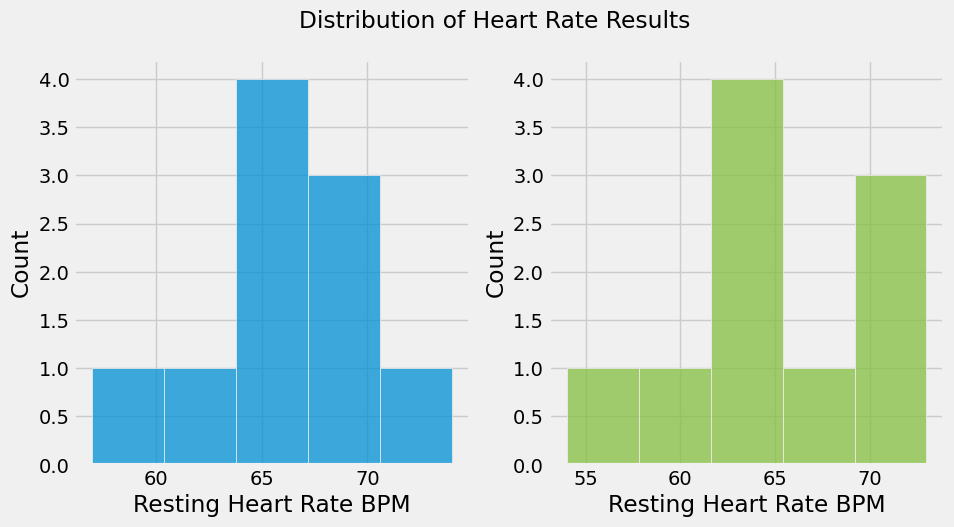

In [34]:
# create an empty plot
fig, ax = plt.subplots(1,2)

# plt the data
sns.histplot(results['before'], ax=ax[0]).set(xlabel='Resting Heart Rate BPM')
sns.histplot(results['after'], ax=ax[1], color='#84bf41').set(xlabel='Resting Heart Rate BPM')

# add a title
plt.suptitle('Distribution of Heart Rate Results')

# show the plot
plt.show()

A Shapiro-Wilk statistical test can be performed on the data to accept the null hypothesis that the data is normally distributed. A test statistic close to one indicates that the data is likely to be normally distributed and a helps determine to reject or accept the null hypothesis (Humaizi, 2024). A common P-Value threshold is 0.05%. If the P-Value is greater than this threshold the null hypothesis is accepted.

For both the before and after results the test statistic is close to one and the p-value is greater than 0.05% and therefore there is no evidence to reject the null hypothesis that the data is normally distributed. This meets the t-Test requirement for the data to be normally distributed.

[shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro)- accessed 17th Nov. 2024

In [35]:
stats.shapiro(results['before'])

ShapiroResult(statistic=0.9726137534909091, pvalue=0.9139645311517168)

In [36]:
stats.shapiro(results['after'])

ShapiroResult(statistic=0.9397047620636736, pvalue=0.5497328687429658)

*"A jitter plot is a variant of the strip plot with a better view of overlapping data points, used to visualise the distribution of many individual one-dimensional values."* (Data Viz Project, n.d.). Seaborn's stripplot draws a categorical scatterplot using jitter to reduce overplotting.

[sns.stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot) - accessed 23rd. Nov 2024.

The jitterplot of the heart rate results data demonstrates the overlap of the data points.

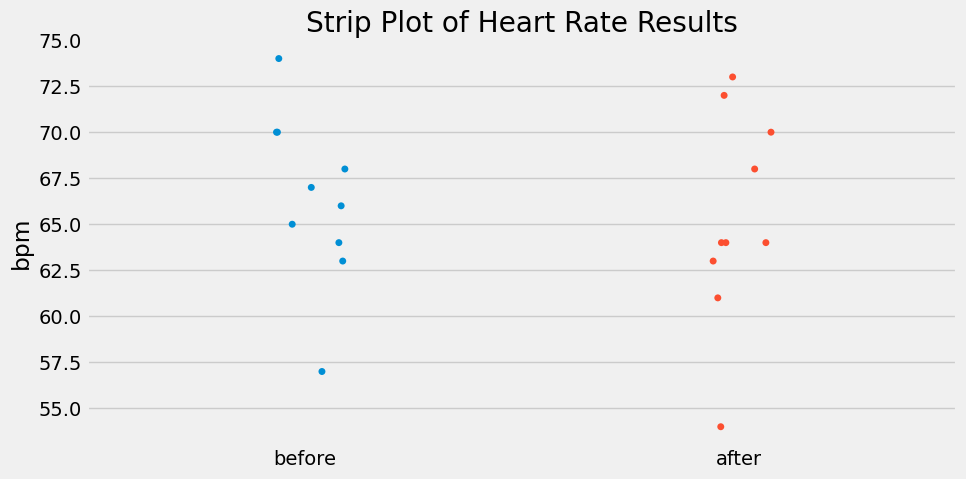

In [37]:
# create an empty plot
fig, ax = plt.subplots()

# Strip plot.
sns.stripplot(data=[results['before'], results['after']])

# annotate the plot
ax.set_ylabel('bpm')
ax.set_title('Strip Plot of Heart Rate Results')

# show the plot
plt.show()


A boxplot *".....is a graph that shows the dispersion and central tendency of a dataset using a five number summary"* (Statistics How To, 2018). Boxplots demonstrate the maximum, minimum, median, outlier and interquartile range for the given dataset.

Detailed information on how to read and interpret boxplots can be found at https://wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots [last accessed 14th Nov. 2025].

Boxplots for the before and after groups demonstrate that the median for the *after* group is lower than the median for the *before* group. More of the data is contained within the interquartile range for the *after* group. The minimum and maximum resting heart rates for the *after* group is lower than the *before* group.

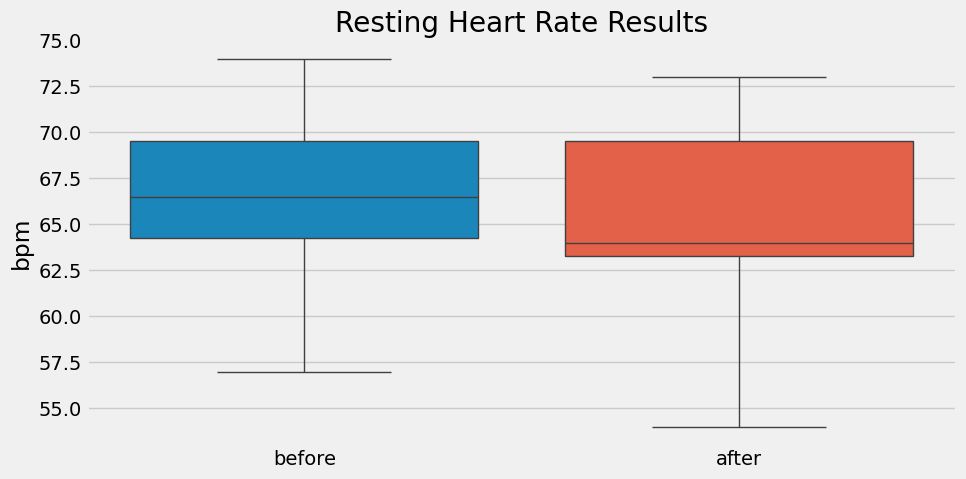

In [38]:
# visualise data with boxplots
fix, ax = plt.subplots()

# plot the data
# https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot
sns.boxplot(data=results[['before', 'after']])

# annotate the plot
ax.set_ylabel('bpm')
ax.set_title('Resting Heart Rate Results')

# show the plot
plt.show()

### Assumptions 

The following assumptions with respect to paired t-Tests are described by Laerd (2018):

1. The dependent variable should be measured on a continuous scale i.e., it is measured at the interval or ratio level. Bhandari (2020) describes the ratio level as data that can be categorized, ranked, evenly spaced, and has a natural zero. Heart rate is something that has a natural zero. One cannot have a negative heart rate.

2. The independent variable should consist of two categorical, "related groups" or "matched pairs". Related groups" indicates that the same subjects are present in both groups. In this instance the related group are the patients as they are present in the before and after group.

3. There should be no significant outliers in the differences between the two related groups. Boxplots confirm this to be the case for the data in the results dataset.

4. The distribution of the differences in the dependent variable between the two related groups should be approximately normally distributed. The *Shapiro-Wilk* test performed on the data confirms this to be the case.

### t-Test Calculation

Mathematically a paired t-Test is express as follows (Wikipedia Contributors, 2019)

$t={\frac {{\bar {X}}_{D}-\mu _{0}}{s_{D}/{\sqrt {n}}}}$

Where:

+ ${\bar {X}}_{D}$ and $s_{D}$ are the average and standard deviation of the differences between all pairs.

+ $μ$ is a constant whose value is zero if one wants to test whether the average of the difference is significantly different.

+ The degree of freedom used is $n − 1$, where $n$ represents the number of pairs.

In practice this is expressed (Brownlee, 2018):

t = (mean(X1) - mean(X2)) / standard error of the difference between the means

The standard error of the difference (sed) between the means can be calculated as follows:

sed = sd / sqrt(n)

Where sd is the standard deviation of the difference between the dependent sample means and n is the total number of paired observations.

The calculation of sd first requires the calculation of the sum of the squared differences between the samples:

d1 = sum (X1[i] - X2[i])^2 for i in n

It also requires the sum of the (non squared) differences between the samples:

d2 = sum (X1[i] - X2[i]) for i in n

We can then calculate sd as:

sd = sqrt((d1 - (d2**2 / n)) / (n - 1))

The code in the following cells is based on code found [here](https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) (https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/ accessed 19th Nov. 2024)

Coding the paired t-Test in *python* the first step is to calculate the means of the samples

In [39]:
mean_before, mean_after = np.mean(results['before']), np.mean(results['after'])

The second step is to calculate $n$, the number of samples.

In [40]:
n = len(results['patient_id'])

Using list comprehension, the the sum of the squared differences between the samples, as well as the sum differences are calculated.

In [41]:
d1 = np.sum([(results['before'][i]-results['after'][i])**2 for i in range(n)])

In [42]:
d2 = np.sum([results['before'][i]-results['after'][i] for i in range(n)])

The standard deviation of the difference between means is calculated.

In [43]:
sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))

The standard deviation of the difference between means is used to calculate the standard error of the difference between the means.

In [44]:
sed = sd / np.sqrt(n)

The t statistic can be calculated.

In [45]:
t_stat = (mean_before - mean_after) / sed

# display the t statistic
t_stat

1.3372274824806385

The degrees of freedom are calculated.

In [46]:
df = n - 1

The p-value can be calculated using the cumulative distribution function on the t-distribution, in SciPy.

In [47]:
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0

p

0.21396011317404273

A comparison of the results of the `stats.ttest_rel()` method can be made.

In [48]:
# assign results of scipy paired t-Test to variables 
sp_stat, sp_p = stats.ttest_rel(results['before'], results['after'])

In [49]:
# compare the manual calculation to the scipy calculation
if round(sp_stat, 3) == round(t_stat, 3):
    print('The manually calculated t-Stat is correct.')

The manually calculated t-Stat is correct.


In [50]:
# compare the manual calculation to the scipy calculation
if round(sp_p, 3) == round(p, 3):
    print('The manually calculated probability is correct.')

The manually calculated probability is correct.


### Conclusion

To determine whether the difference between the population means is statistically significant the p-value is compared to the significance level. A significance level of 0.05 works well (Minitab.com, 2024). A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference

If the p-value is greater than the significance level, the decision is to fail to reject the null hypothesis.

In [51]:
# implement in python
if p > 0.05:
	print('Accept null hypothesis that the means are equal.'
	   '\nThere is no statistically significant difference' 
	   ' between the average resting heart rates of patients that underwent'
	   ' a two-week fitness regime.')
else:
	print('Reject the null hypothesis that the means are equal.'
	   '\nThere is a statistically significant difference' 
	   ' between the average resting heart rates of patients that underwent'
	   ' a two-week fitness regime.')

Accept null hypothesis that the means are equal.
There is no statistically significant difference between the average resting heart rates of patients that underwent a two-week fitness regime.


### References

Britannica (2019). Student’s t-test | statistics. In: Encyclopædia Britannica. [online] Available at: https://www.britannica.com/science/Students-t-test. [Accessed 14th Nov 2024].

Brownlee, J. (2018). How to Code the Student’s t-Test from Scratch in Python. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/. [Accessed 18th Nov 2024].

builtin.com. (n.d.). How to Do a T-Test in Python | Built In. [online] Available at: https://builtin.com/data-science/t-test-python. [Accessed 14th Nov 2024].

Data Viz Project. (n.d.). Jitter Plot. [online] Available at: https://datavizproject.com/data-type/jitter-plot/. [Accessed 23rd Nov 2024].


GeeksforGeeks. (2018). Different ways to create Pandas Dataframe. [online] Available at: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/.‌ [Accessed 13th Nov 2024].

Humaizi, A. (2024). 10.0 Shapiro-Wilk test - Ahmad Humaizi - Medium. [online] Medium. Available at: https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6. [Accessed 29 Oct. 2024].

Laerd Statistics (2018). Independent t-test in SPSS Statistics - Procedure, output and interpretation of the output using a relevant example | Laerd Statistics. [online] Laerd.com. Available at: https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php. [Accessed 18th Nov. 2024].

Maverick, J.B. (2021). What assumptions are made when conducting a t-test? [online] Investopedia. Available at: https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp. [Accessed 14th Nov 2024].

Pydata.org. (2024). pandas.DataFrame — pandas 2.2.3 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas-dataframe [Accessed 14 Nov. 2024].

Scipy.org. (2024). shapiro — SciPy v1.14.1 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro [Accessed 14 Nov. 2024].

Waskom, M. (2021). seaborn: statistical data visualization — seaborn 0.10.1 documentation. [online] seaborn.pydata.org. Available at: https://seaborn.pydata.org/index.html  [Accessed 27 Nov. 2024].

Wikipedia Contributors (2019). Student’s t-test. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Student%27s_t-test.[Accessed 14th Nov 2024].

---

## Task 4 - ANOVA <a id="task-4---anova"></a>

### Problem Statement

In this test the probability of committing a type II error in specific circumstances is estimated.

1. To begin, create a variable called `no_type_ii` and set it to `0`.

2. Use a loop to perform the following test 10,000 times.

3. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

4. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

5. Summarize and explain your results.

### Introduction

![anova](images/task_4/anova.png "anova")

Images sourced - https://media.geeksforgeeks.org/wp-content/uploads/20201111175412/custom.png -accessed 27th Nov.2024.

ANOVA was developed by the statistician [Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) (https://en.wikipedia.org/wiki/Ronald_Fisher) . The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more unrelated groups (Laerd Statistics, 2018) and therefore generalizes the t-test.

### Problem Statement Part 1 - Solution

1. To begin, create a variable called `no_type_ii` and set it to `0`.

In [52]:
no_type_ii = 0

### Problem Statement Part 3 - Solution

Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`.

[rng.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal) - accessed 27th Nov. 2024.

In [53]:
# randomly generate the requested values
sample_one = rng.normal(4.9, 0.1, 100)

sample_two = rng.normal(5, 0.1, 100)

sample_three = rng.normal(5.1, 0.1, 100)

### Data Visualisation

Plotting the distribution of each of the randomly generated distributions demonstrates how each dataset is distributed or spread around it's mean. A subjective interpretation of this plot indicates that the data in each sample is centred on a different mean value.

[plt.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist)

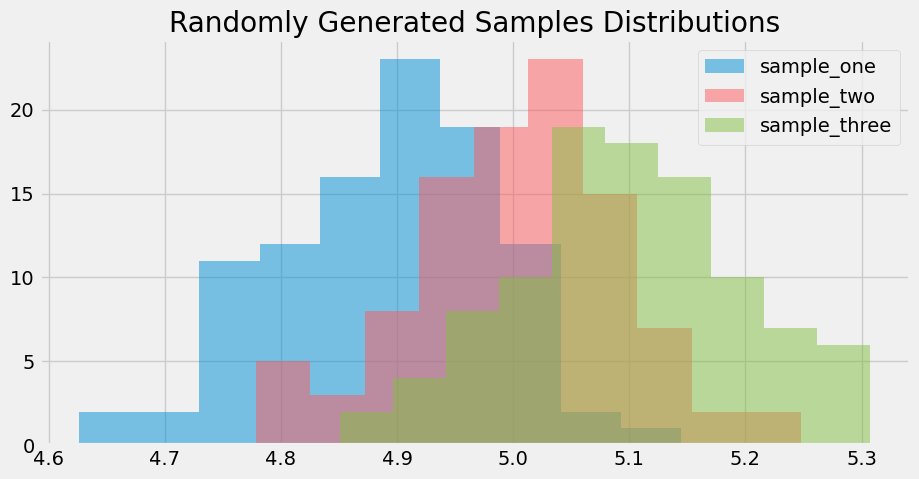

In [54]:
# create an empty plot
fig, ax = plt.subplots()

# plot the data
ax.hist(sample_one, alpha=0.5, label='sample_one')
ax.hist(sample_two, color='#ff595e',  alpha=0.5, label='sample_two')
ax.hist(sample_three, color='#84bf41', alpha=0.5, label='sample_three')

# annotate the plot
ax.legend()
ax.set_title('Randomly Generated Samples Distributions')

# show
plt.show()

Boxplots of the randomly generated samples support the hypothesis that the means of each sample are different as the boxplot clearly demonstrates that the means have different values. The mean of each dataset is visualised as the white dot on the boxplot.

[sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot)

In [55]:
# visualise the mean
#  based on code from - https://www.statology.org/seaborn-boxplot-mean/
meanprops={'marker':'o', 'markerfacecolor':'white', 
           'markeredgecolor':'black', 'markersize':'8'}

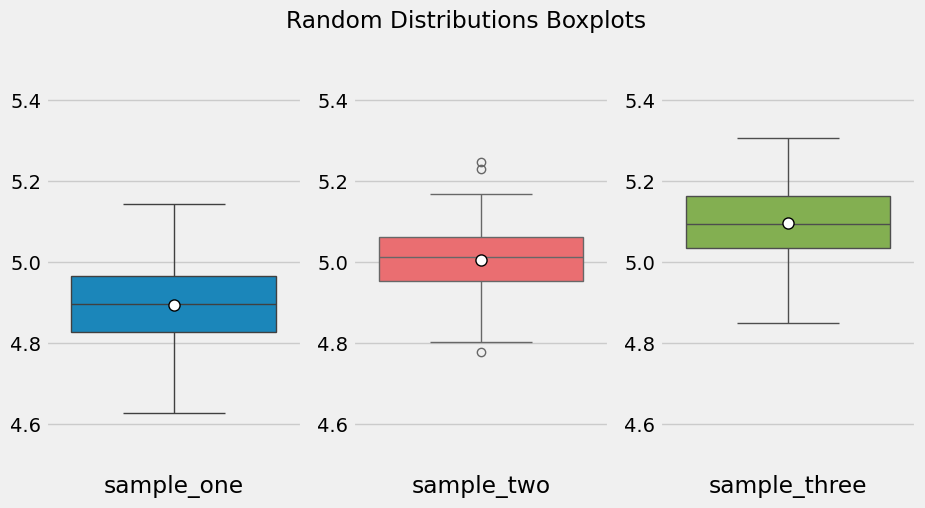

In [56]:
plt.subplot(1, 3, 1)
sns.boxplot(sample_one, showmeans=True, meanprops=meanprops).set(xlabel='sample_one')
plt.ylim(4.5, 5.5)

plt.subplot(1, 3, 2)
sns.boxplot(sample_two, color='#ff595e', showmeans=True, 
            meanprops=meanprops).set(xlabel='sample_two')
plt.ylim(4.5, 5.5)

plt.subplot(1, 3, 3)
sns.boxplot(sample_three, color='#84bf41', showmeans=True, 
            meanprops=meanprops).set(xlabel='sample_three')
plt.ylim(4.5, 5.5)

plt.suptitle('Random Distributions Boxplots')

plt.show()

### References

Bobbitt, Z. (2023). Seaborn: How to Display Mean Value on Boxplot. [online] Statology. Available at: https://www.statology.org/seaborn-boxplot-mean/ [Accessed 27 Nov. 2024].

Laerd Statistics (2018). One-way ANOVA in SPSS Statistics - Step-by-step procedure including testing of assumptions. [online] Laerd.com. Available at: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php.

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 27 Nov. 2024].

Numpy (2024). NumPy. [online] Numpy.org. Available at: https://numpy.org/. [Accessed 27 Nov. 2024].

Waskom, M. (2021). seaborn: statistical data visualization — seaborn 0.10.1 documentation. [online] seaborn.pydata.org. Available at: https://seaborn.pydata.org/index.html  [Accessed 27 Nov. 2024].

Wikipedia Contributors (2019). Ronald Fisher. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Ronald_Fisher. [Accessed 10th Oct. 2024].

---

Notebook ends.